In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train_agriculture.csv')
test_df = pd.read_csv('test_agriculture.csv')

In [4]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [11]:
test_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


* only Number_weeks_Used column has null values

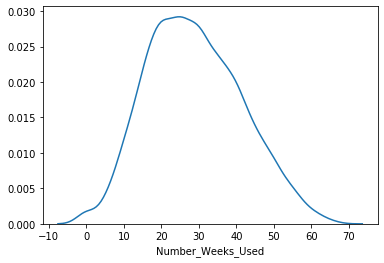

In [10]:
sns.distplot(train_df['Number_Weeks_Used'], hist = False)

In [13]:
# fill the Number_weeks_Used columns with mean 
train_df.fillna(train_df['Number_Weeks_Used'].mean(), inplace = True)
test_df.fillna(test_df['Number_Weeks_Used'].mean(), inplace = True)

In [14]:
train_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [15]:
test_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [17]:
train_df['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [18]:
train_df['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [19]:
train_df['Pesticide_Use_Category'].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [20]:
train_df['Season'].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [21]:
train_df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

# EDA

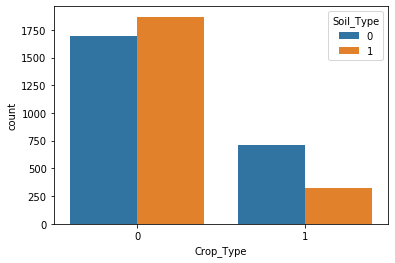

In [23]:
sns.countplot(train_df['Crop_Type'], hue = train_df['Soil_Type'])

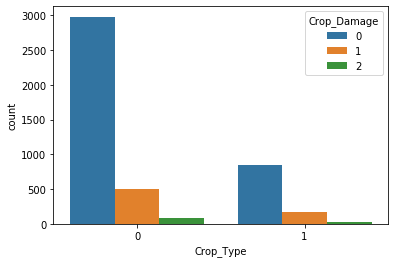

In [24]:
sns.countplot(train_df['Crop_Type'], hue = train_df['Crop_Damage'])

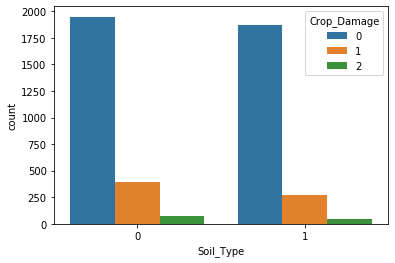

In [25]:
sns.countplot(train_df['Soil_Type'], hue = train_df['Crop_Damage'])

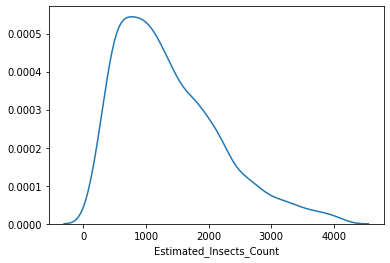

In [29]:
sns.distplot(train_df['Estimated_Insects_Count'], hist = False)

In [37]:
df_ct0 = train_df(train_df['Crop_Type'] == 0)
df_ct1 = train_df(train_df['Crop_Type'] == 1)

TypeError: 'DataFrame' object is not callable

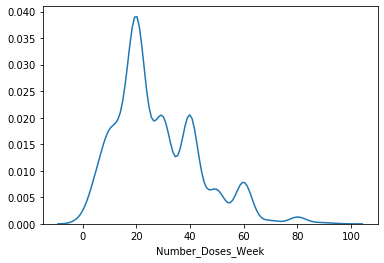

In [39]:
sns.distplot(df_ct0['Number_Doses_Week'], hist = False)

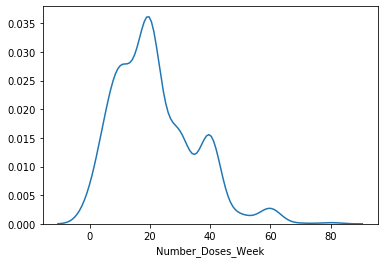

In [40]:
sns.distplot(df_ct1['Number_Doses_Week'], hist = False)

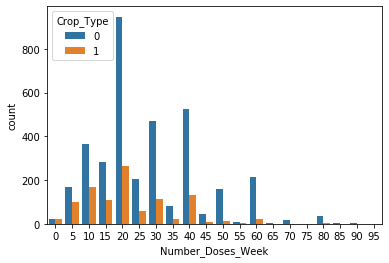

In [34]:
sns.countplot(train_df['Number_Doses_Week'], hue = train_df['Crop_Type'])

crop type 0 has more need for pesticide doses per week than type 1 crop

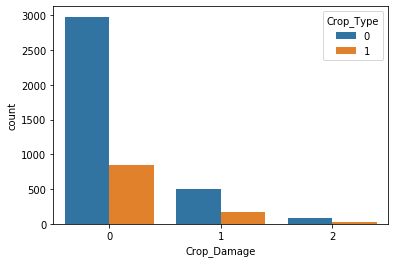

In [35]:
sns.countplot(train_df['Crop_Damage'], hue = train_df['Crop_Type'])

As evident from the graph crop type 0 has more crop damage due to pesticide than crop type 1

# Outliers

In [49]:
cols = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

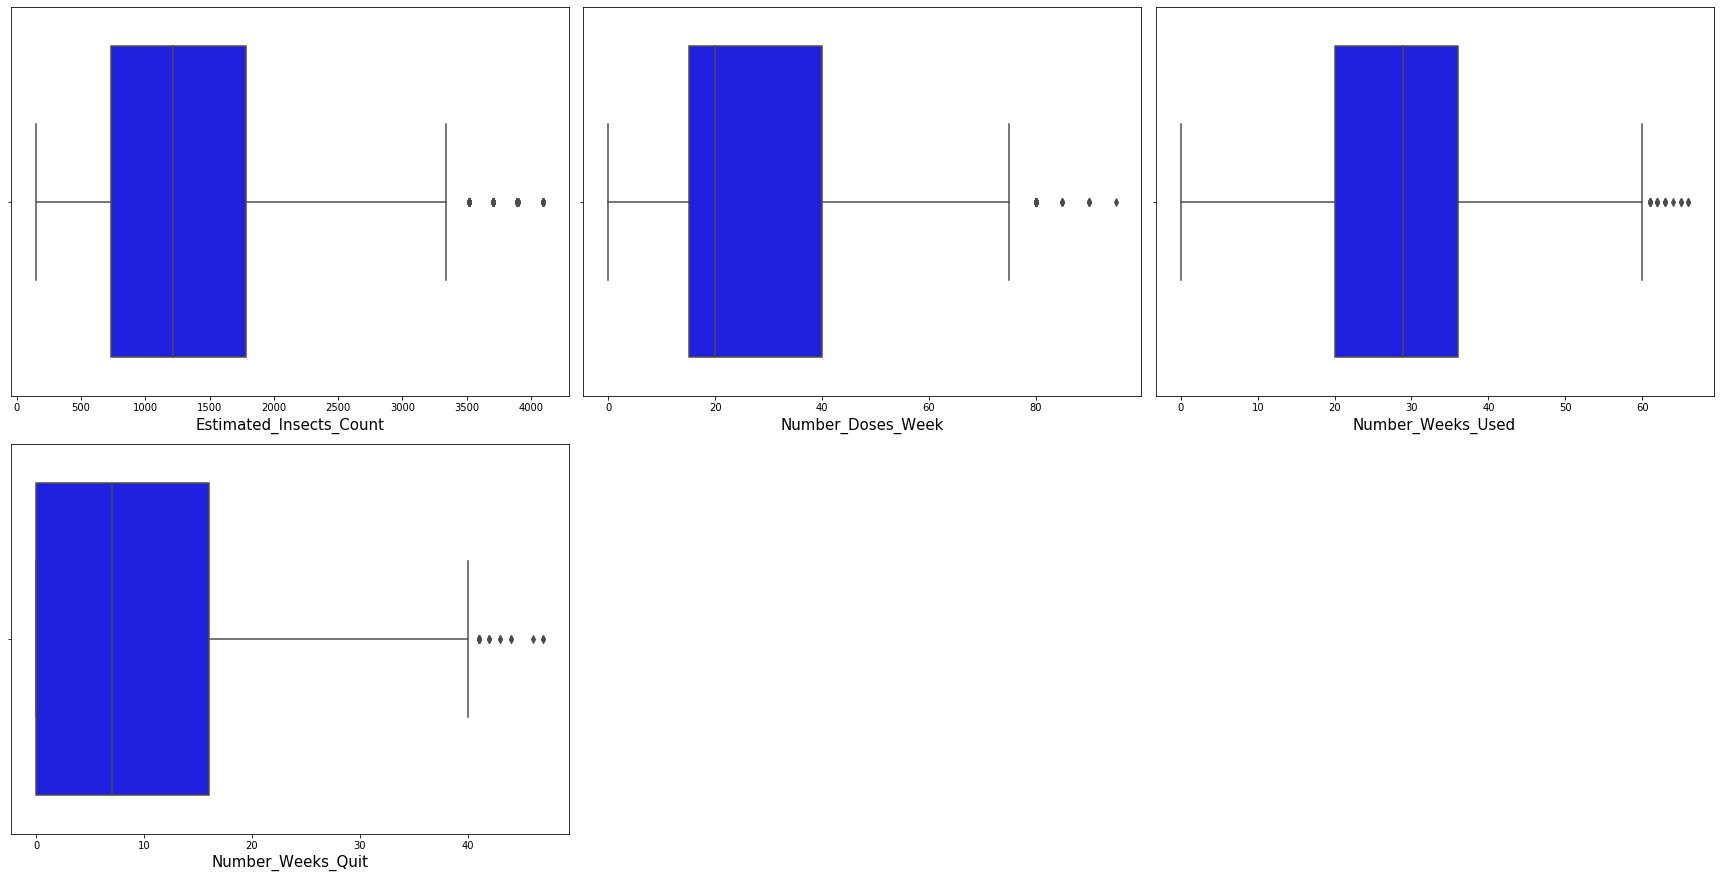

In [50]:
plt.figure(figsize=(24,30))
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    ax = sns.boxplot(train_df[cols[i]], orient='h', color = "blue")
    ax.set_xlabel(cols[i],fontsize=15)
    plt.tight_layout()

In [51]:
temp_df = train_df[cols]
threshold = 3

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([  22,   23,  100,  185,  252,  325,  346,  375,  384,  702,  703,
         704,  705,  706,  807,  855,  856,  911,  978,  998, 1017, 1019,
        1097, 1212, 1291, 1307, 1324, 1326, 1329, 1337, 1341, 1342, 1343,
        1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406, 1443, 1457, 1489,
        1523, 1589, 1652, 1654, 1868, 2019, 2090, 2136, 2140, 2165, 2174,
        2183, 2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2392, 2553,
        2565, 2589, 2590, 2591, 2615, 2702, 2714, 2779, 2928, 2929, 2940,
        2942, 2944, 2945, 3048, 3241, 3252, 3253, 3254, 3255, 3256, 3257,
        3336, 3388, 3526, 3682, 3718, 3766, 3830, 3840, 3841, 3856, 3894,
        3902, 3915, 3919, 3932, 3932, 3933, 3934, 3935, 3936, 3937, 3938,
        3939, 3940, 3940, 4024, 4186, 4213, 4274, 4375, 4376, 4436, 4516],
       dtype=int64),
 array([0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1,
        1, 1, 1,

In [53]:
df_new = train_df[(z<threshold).all(axis=1)]
df_new.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [56]:
#Percentage of data lost
((4599-len(df_new))/4599)*100

2.5440313111545985

In [61]:
df_new.reset_index(inplace=True,drop=True)

Percentage of data lost is less than 5% so it is okay

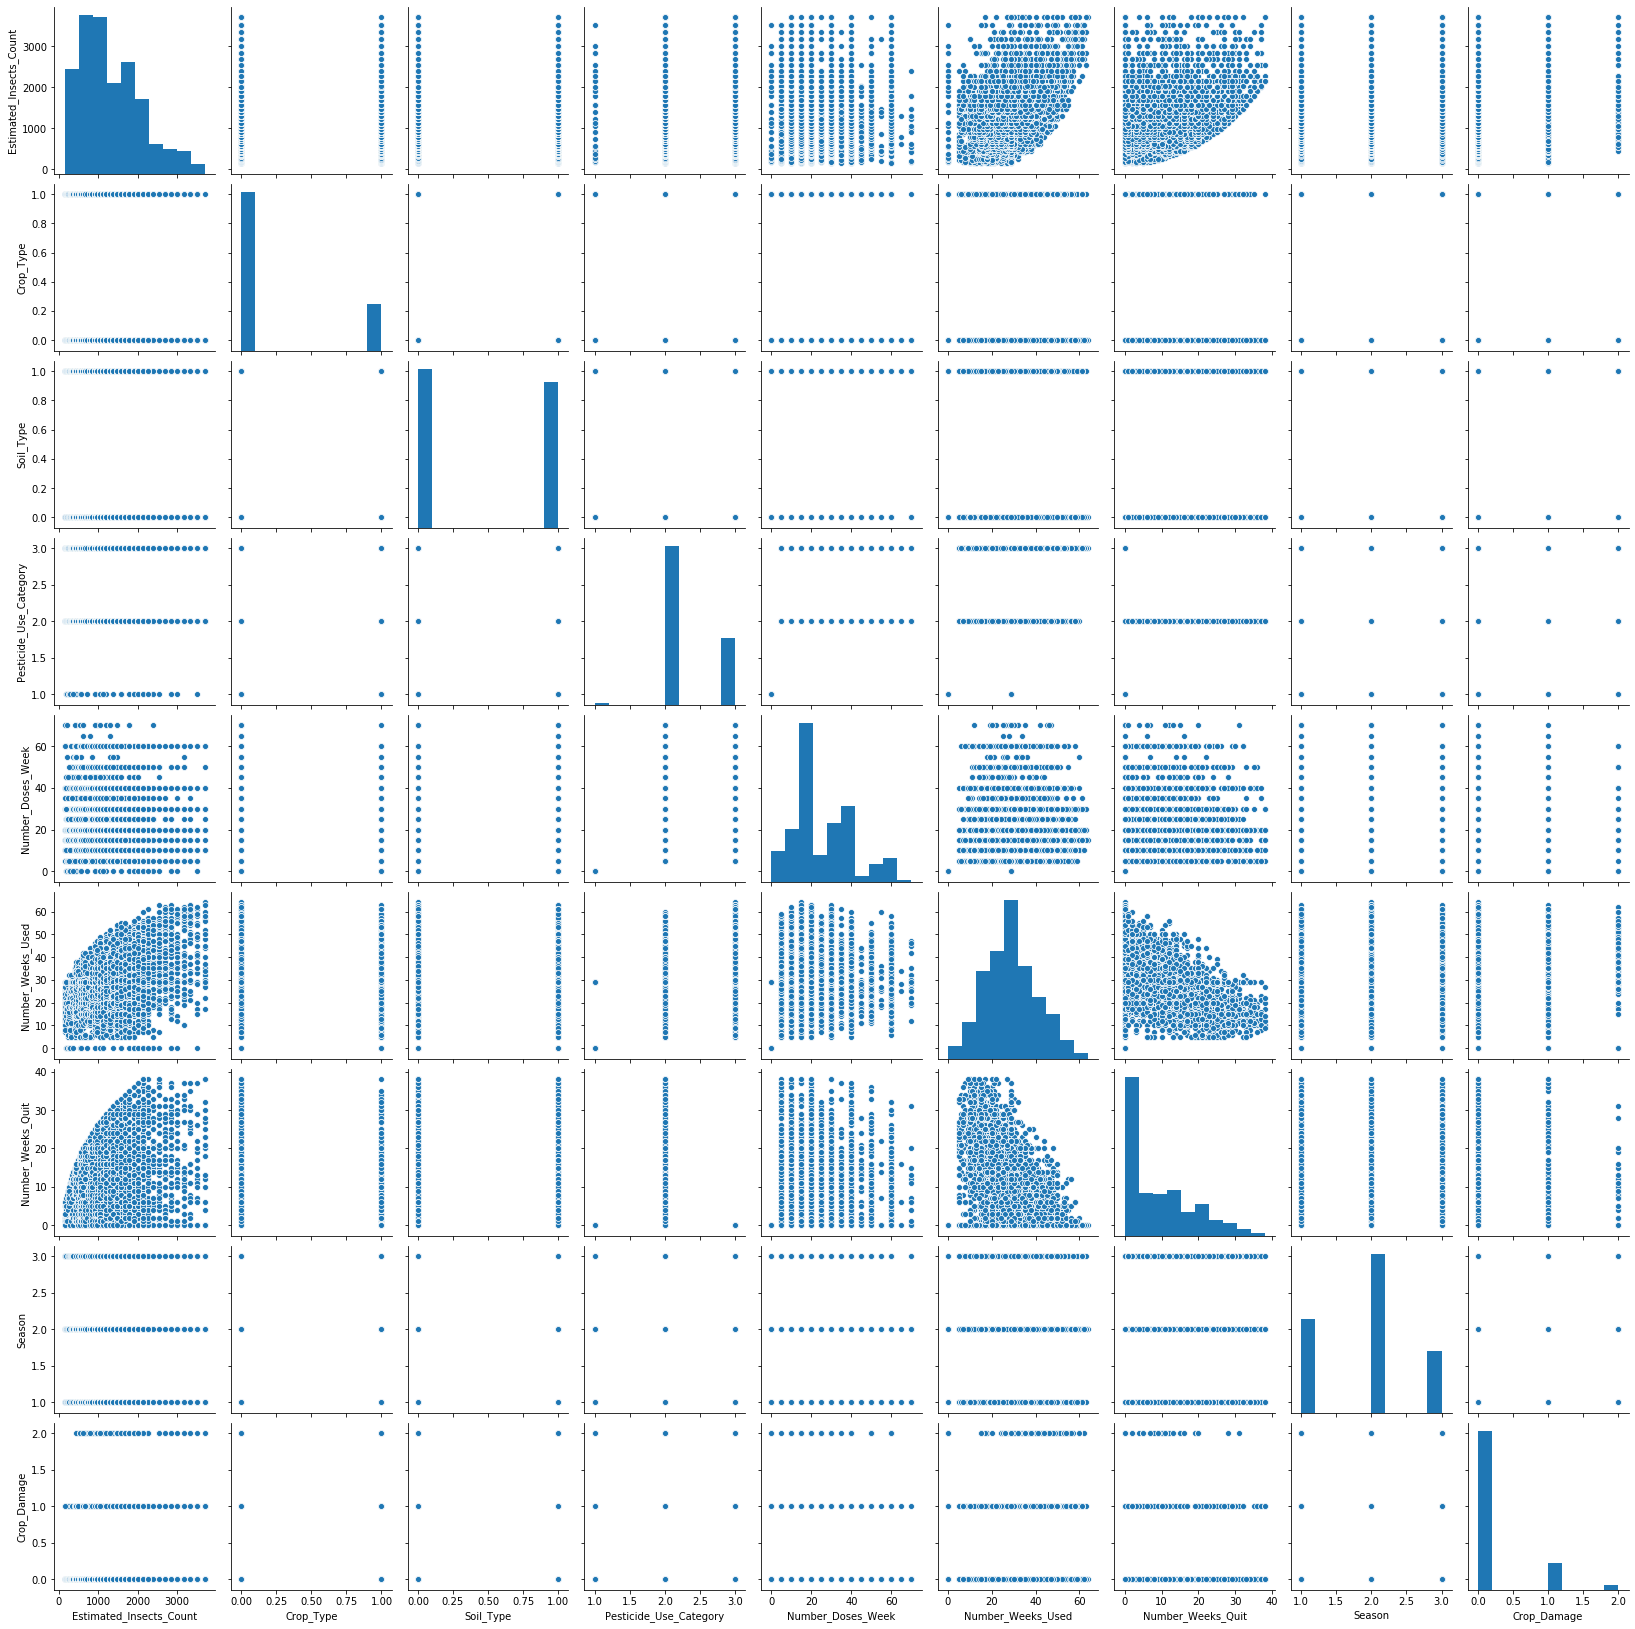

In [62]:
sns.pairplot(df_new)

# Correlation

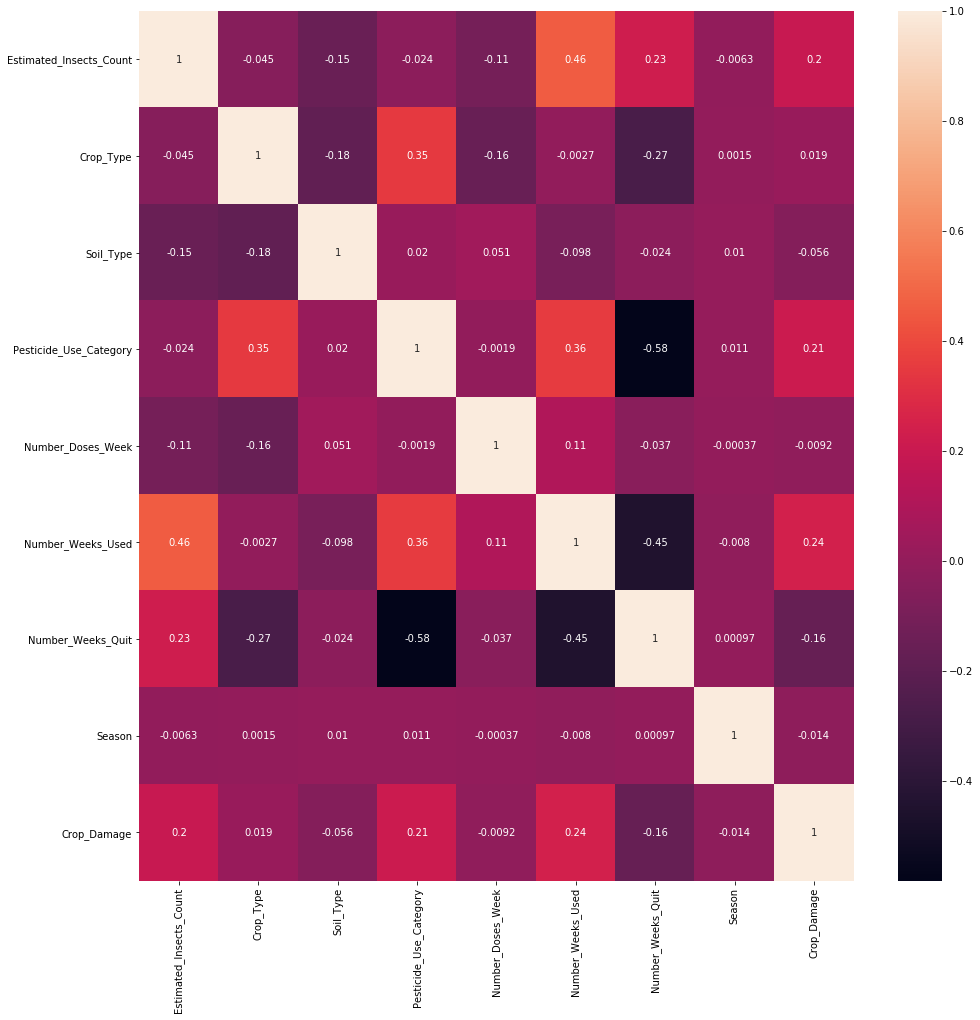

In [64]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True)

# Removing Skewness

In [58]:
df_new.skew()

Estimated_Insects_Count    0.786548
Crop_Type                  1.307543
Soil_Type                  0.087574
Pesticide_Use_Category     0.692099
Number_Doses_Week          0.701792
Number_Weeks_Used          0.264546
Number_Weeks_Quit          0.834440
Season                     0.143579
Crop_Damage                2.327404
dtype: float64

In [65]:
x = df_new.drop(['Crop_Damage', 'Number_Doses_Week', 'Season', 'Crop_Type', 'Soil_Type'],axis=1).copy()
y = df_new.loc[:,'Crop_Damage'].copy()

In [66]:
from sklearn.preprocessing import power_transform
transf = pd.DataFrame(power_transform(x[['Estimated_Insects_Count', 'Pesticide_Use_Category', 'Number_Weeks_Quit']],method='yeo-johnson'))
transf.rename({0:'Estimated_Insects_Count',1: 'Pesticide_Use_Category', 2:'Number_Weeks_Quit'}, axis=1, inplace = True)
x.drop(['Estimated_Insects_Count', 'Pesticide_Use_Category', 'Number_Weeks_Quit'],axis=1 ,inplace=True)
x = pd.concat((x, transf), axis=1)
x

,ID,Number_Weeks_Used,Estimated_Insects_Count,Pesticide_Use_Category,Number_Weeks_Quit
0,F00000001,0.000000,-2.215739,-4.499986,-1.238951
1,F00000003,0.000000,-2.122000,-4.499986,-1.238951
2,F00000004,0.000000,-1.928969,-4.499986,-1.238951
3,F00000005,0.000000,-1.928969,-4.499986,-1.238951
4,F00000006,0.000000,-1.638883,-4.499986,-1.238951
...,...,...,...,...,...
4477,F00008078,28.891027,1.064780,-0.549770,-0.786695
4478,F00008079,47.000000,1.065705,-0.549770,-0.501387
4479,F00008080,7.000000,1.181816,-0.549770,1.391329
4480,F00008082,20.000000,1.181816,-0.549770,1.280608


In [71]:
x.drop('ID', inplace = True, axis=1)

In [72]:
x.skew()

Number_Weeks_Used          0.264546
Estimated_Insects_Count   -0.041827
Pesticide_Use_Category    -0.053673
Number_Weeks_Quit         -0.093572
dtype: float64

# Model

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x)
x_c = pd.DataFrame(x_c)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'max_depth':[5,8,50,100,150], 
                                 'min_samples_leaf':[2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [78]:
max_scr = 0

for r_s in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=r_s,test_size=0.01)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Score :  0.9555555555555556
Random State :  99


# SVC is the best model with 96% accuracy at random state 99

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [ ]:
grid.fit(x_train, y_train)